In [1]:

from __future__ import print_function
import os
import glob
from keras.models import Sequential
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger, ReduceLROnPlateau, EarlyStopping
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.layers.normalization import BatchNormalization
import numpy as np

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
train_dir = "/home/asus/Desktop/Dataset_splits/train/"
test_dir = "/home/asus/Desktop/Dataset_splits/validation/"

In [4]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)
csv_logger = CSVLogger('editalexnet_scratch_log.csv')

In [5]:
def get_nb_files(directory):
    """Get number of files by searching directory recursively"""
    if not os.path.exists(directory):
        return 0
    cnt = 0
    for r, dirs, files in os.walk(directory):
        for dr in dirs:
            cnt += len(glob.glob(os.path.join(r, dr + "/*")))
    return cnt

In [6]:
def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'r.')
    plt.plot(epochs, val_accuracy, 'r')
    plt.title('Training and validation accuracy')

    plt.figure()
    plt.plot(epochs, loss, 'r.')
    plt.plot(epochs, val_loss, 'r-')
    plt.title('Training and validation loss')
    plt.show()

In [7]:
batch_size = 128
epochs = 25
nb_train_samples = get_nb_files(train_dir)
num_classes = len(glob.glob(train_dir + "/*"))
nb_val_samples = get_nb_files(test_dir)


In [8]:
# input image dimensions
IM_WIDTH, IM_HEIGHT = 150, 150
input_shape = (IM_WIDTH, IM_HEIGHT, 3)

In [9]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(IM_WIDTH, IM_HEIGHT), batch_size=batch_size)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(IM_WIDTH, IM_HEIGHT), batch_size=batch_size)

Found 22110 images belonging to 33 classes.
Found 4132 images belonging to 33 classes.


In [11]:
model = Sequential()
model.add(Conv2D(64, (11, 11), input_shape=input_shape, padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (3, 3)))

model.add(Conv2D(128, (7, 7), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Convolution2D(192, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Convolution2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(12 * 12 * 256, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4096, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes , activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      23296     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       401536    
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 50, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 50, 50, 128)      

In [13]:
# model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit_generator(train_generator, nb_epoch=epochs, steps_per_epoch=nb_train_samples // batch_size,
#                                     validation_data=test_generator, nb_val_samples=nb_val_samples // batch_size,
#                                     class_weight='auto', callbacks=[lr_reducer, early_stopper, csv_logger])


In [14]:
# model.save('finalAlex_Net_scratch.h5')

In [15]:
from keras.models import load_model

loaded_model= load_model('finalAlex_Net_scratch.h5')
loaded_model

/home/asus/.local/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [16]:
class_dict = train_generator.class_indices
print(class_dict)

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0, 'Corn_(maize)___Common_rust_': 1, 'Corn_(maize)___healthy': 2, 'GD_Alternia': 3, 'GD_Deficiency': 4, 'GD_Healthy': 5, 'GD_Leaf_Blight': 6, 'GD_Rust': 7, 'GD_Spidermites': 8, 'GD_Toxicity': 9, 'GD_Webbloch': 10, 'Paddy_Bacterial_leaf_blight': 11, 'Paddy_Brown_spot': 12, 'Pepper__bell___Bacterial_spot': 13, 'Pepper__bell___healthy': 14, 'Potato___Early_blight': 15, 'Potato___Late_blight': 16, 'Potato___healthy': 17, 'Tomato_Bacterial_spot': 18, 'Tomato_Early_blight': 19, 'Tomato_Late_blight': 20, 'Tomato_Leaf_Mold': 21, 'Tomato_Septoria_leaf_spot': 22, 'Tomato_Spider_mites_Two_spotted_spider_mite': 23, 'Tomato__Target_Spot': 24, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 25, 'Tomato__Tomato_mosaic_virus': 26, 'Tomato_healthy': 27, 'pomo_Alternaria_Alternata': 28, 'pomo_Anthracnose': 29, 'pomo_Bacterial_Blight': 30, 'pomo_Cercospora_LeafSpot': 31, 'pomo_Healthy_Leaves': 32}


In [17]:
li = list(class_dict.keys())
print(li)

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'GD_Alternia', 'GD_Deficiency', 'GD_Healthy', 'GD_Leaf_Blight', 'GD_Rust', 'GD_Spidermites', 'GD_Toxicity', 'GD_Webbloch', 'Paddy_Bacterial_leaf_blight', 'Paddy_Brown_spot', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy', 'pomo_Alternaria_Alternata', 'pomo_Anthracnose', 'pomo_Bacterial_Blight', 'pomo_Cercospora_LeafSpot', 'pomo_Healthy_Leaves']


In [18]:
class_names = {0:'GD_Healthy',1:'GD_Leaf_Blight',2:'Tomato_septoria_leaf_spot',3:'Tomato_Spidermites',4:'pomogranate_bacterial_blight',5:'Pomogranate_cercospora',
               6:'Potato_late_blight',7:'Corn_rust',8:'Tomato_healthy',9:'GD_Webbloch',10:'Tomato_late_blight',11:'Pomogranate_alternaria_alternata',
              12:'pepper_bell_bacterialspot',13:'Paddy_bacterial_leafspot',14:'Potato_healthy',15:'tomato_mosaic_virus',16:'GD_rust',
              17:'Pepperbell_healthy',18:'GD_Deficiency',19:'GD_toxicity',20:'pomo_healthy_leaf',21:'potato_early_blight',22:'tomato_target_spot',23:'tomato_yellow_leaf_curl',
               24:'tomato_early_blight',25:'GD_alternaria',26:'tomato_bacterial_spot',27:'corn_cercospora_leafspot',28:'tomato_leaf_mold',29:'corn_healthy',30:'paddy_brown_spot',31:'GD_spidermites',32:'pomo_anthracnose'}

In [19]:
import cv2

Following is our prediction:



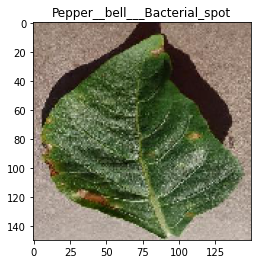

In [21]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/home/asus/Desktop//Dataset_splits/test/Pepper__bell___Bacterial_spot/anu27.jpg"
new_img = image.load_img(image_path, target_size=(150, 150))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# # # decode the results into a list of tuples (class, description, probability)
# # # (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

# # Another way
# img_class = model.predict_classes(img)
# img_prob = model.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('on')
# # out = loaded_model.predict(img) 
# # print(out)
# # print(np.argmax(out))
# # plt.title(class_name[np.argmax(out)])
plt.title(class_name)
plt.show()